In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [37]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

In [74]:
heart = pd.read_csv('heart.csv')
heart.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [75]:
df = heart.copy()

In [77]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [78]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [79]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

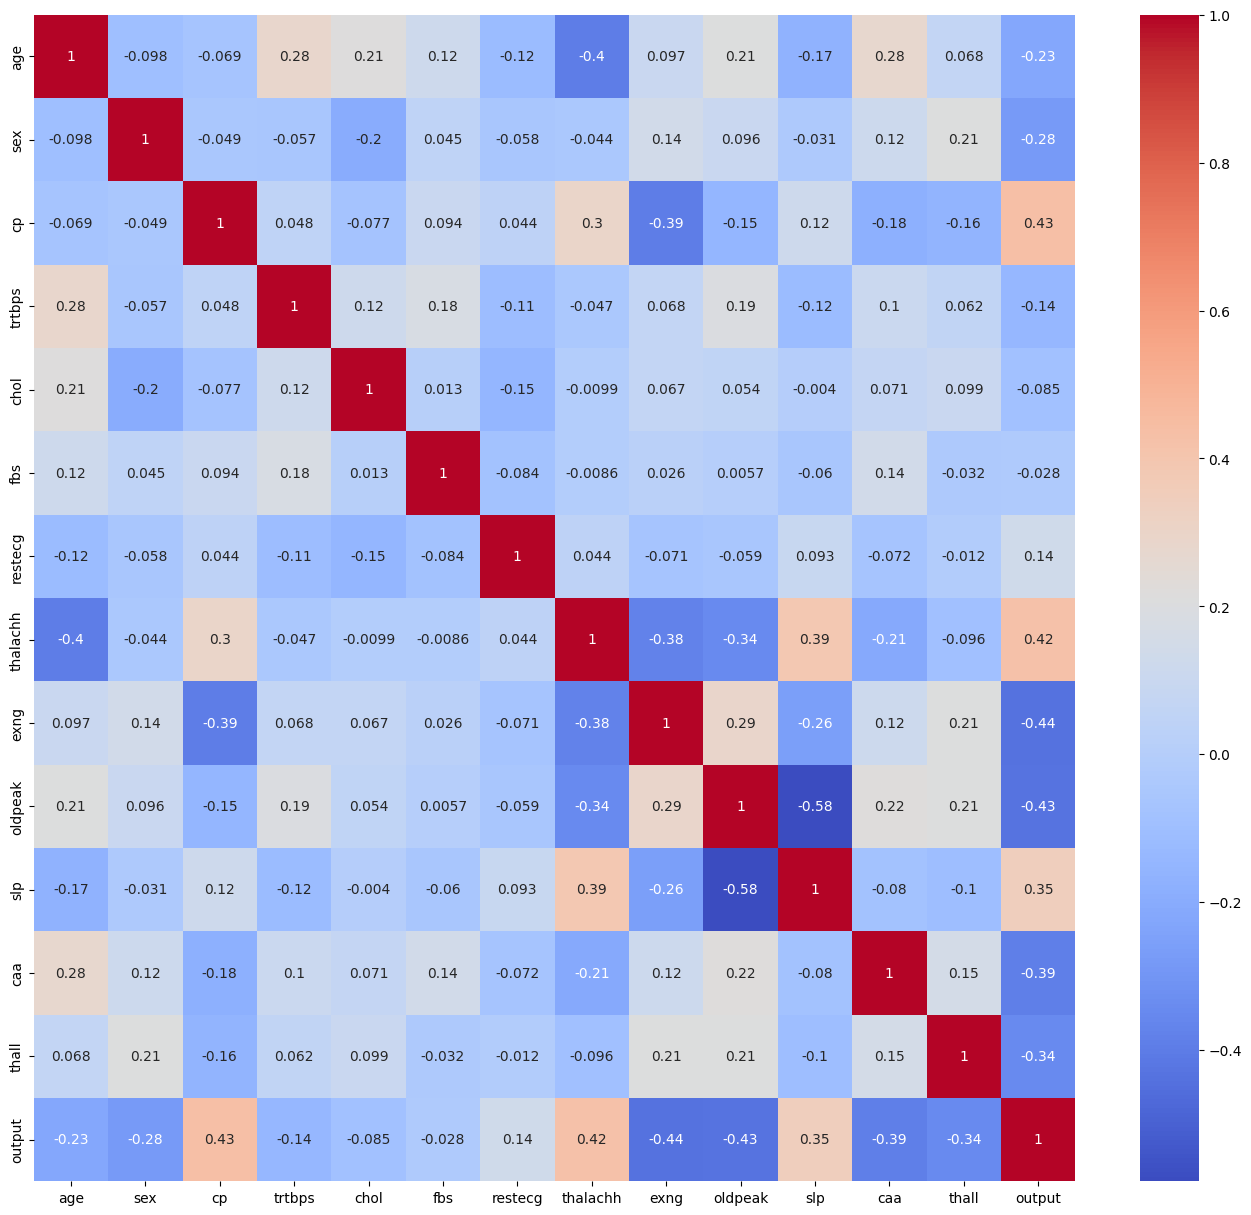

In [80]:
plt.figure(figsize=(len(df.columns) * 1.2, len(df) * 0.05))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

cp, restecg, thalachh, slp => output

In [81]:
pd.plotting.scatter_matrix(df, c=df.output, figsize=[100, 100], s=150)
plt.show()

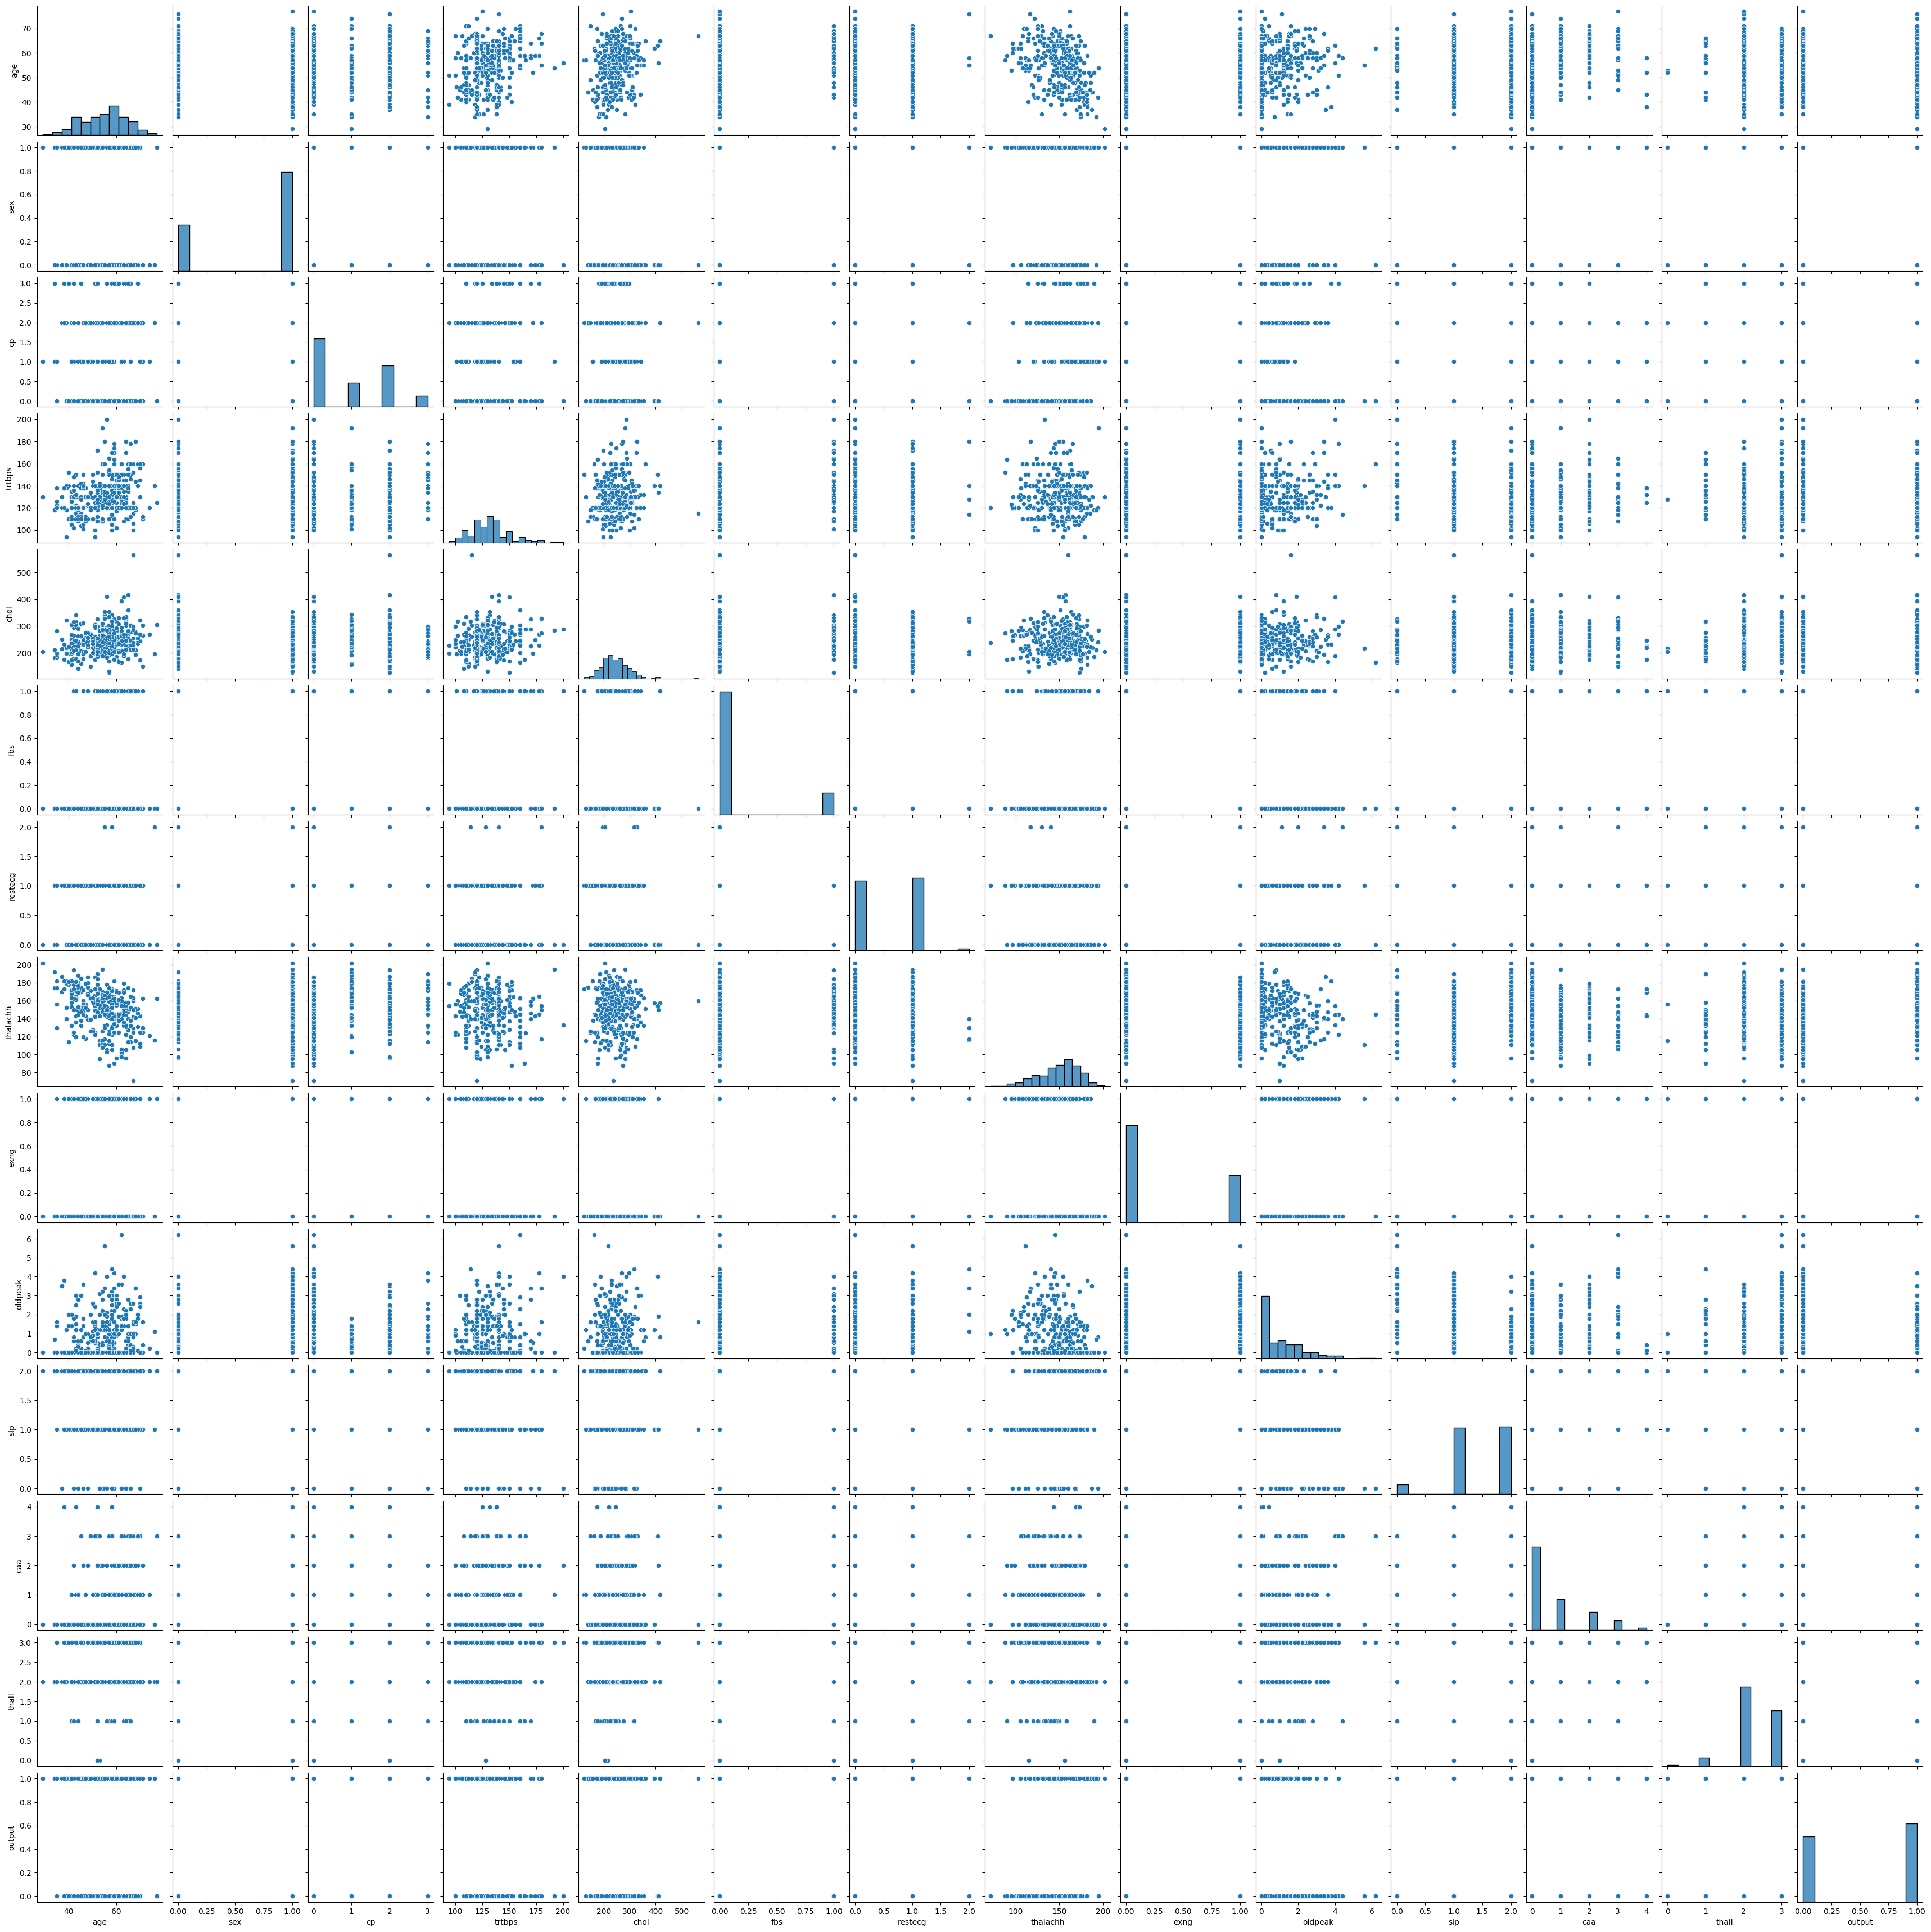

In [82]:
sns.pairplot(df)
plt.show()

In [83]:
X_columns = ['age',	'sex',	'cp',	'trtbps',	'chol',	'fbs',	'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall']

In [84]:
X = df[X_columns]
y = df['output']

In [85]:
standardscaler = preprocessing.StandardScaler()
X = standardscaler.fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [86]:
RFC = RandomForestClassifier()
RFC.fit(X, y)

importances = RFC.feature_importances_
for feature, importance in zip(X_columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: age, Importance: 0.08914345704129666
Feature: sex, Importance: 0.0328174631255112
Feature: cp, Importance: 0.14701608244085584
Feature: trtbps, Importance: 0.07330365678426047
Feature: chol, Importance: 0.08025327192441332
Feature: fbs, Importance: 0.010881707756606726
Feature: restecg, Importance: 0.01696856737879772
Feature: thalachh, Importance: 0.11075056133038011
Feature: exng, Importance: 0.05159377043368356
Feature: oldpeak, Importance: 0.1188816944230049
Feature: slp, Importance: 0.05134752760984409
Feature: caa, Importance: 0.10731957483896978
Feature: thall, Importance: 0.10972266491237562


cp, thalachh, oldpeak, caa, thall => output

In [87]:
for col in X_columns:
    contingency_table = pd.crosstab(df[col], df['output'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {col}, p-value: {p:.4f}")


Feature: age, p-value: 0.1309
Feature: sex, p-value: 0.0000
Feature: cp, p-value: 0.0000
Feature: trtbps, p-value: 0.4848
Feature: chol, p-value: 0.1052
Feature: fbs, p-value: 0.7444
Feature: restecg, p-value: 0.0067
Feature: thalachh, p-value: 0.0735
Feature: exng, p-value: 0.0000
Feature: oldpeak, p-value: 0.0000
Feature: slp, p-value: 0.0000
Feature: caa, p-value: 0.0000
Feature: thall, p-value: 0.0000


age, trtbps, chol, fbs => output

In [182]:
X_columns = ['age',	'sex',	'cp',	'trtbps',	'chol',	'fbs',	'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall']
X_columns_heatmap = ['cp',	'restecg',	'slp']
X_columns_RF =  ['cp',	'oldpeak',	'caa', 'thall']
X_columns_chi2 = ['age', 'trtbps',	'fbs']

In [183]:
X = df[X_columns_RF]

<h1>KNN</h1>

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


In [185]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print("Best number of neighbors:", grid_search.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", grid_search.best_score_)

Best number of neighbors: 11
Best cross-validated accuracy: 0.8446236559139786


In [219]:
k = 11

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8688524590163934
Precision: 0.868421052631579
Recall: 0.9166666666666666
F1 Score: 0.8918918918918919


In [221]:
y_prob = knn.predict_proba(X_test)[:, 1]

threshold = 0.27272
y_pred = (y_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Threshold:", threshold)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Threshold: 0.27272
Accuracy: 0.8032786885245902
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571


<h1>Decision Trees</h1>

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [228]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8360655737704918


In [231]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

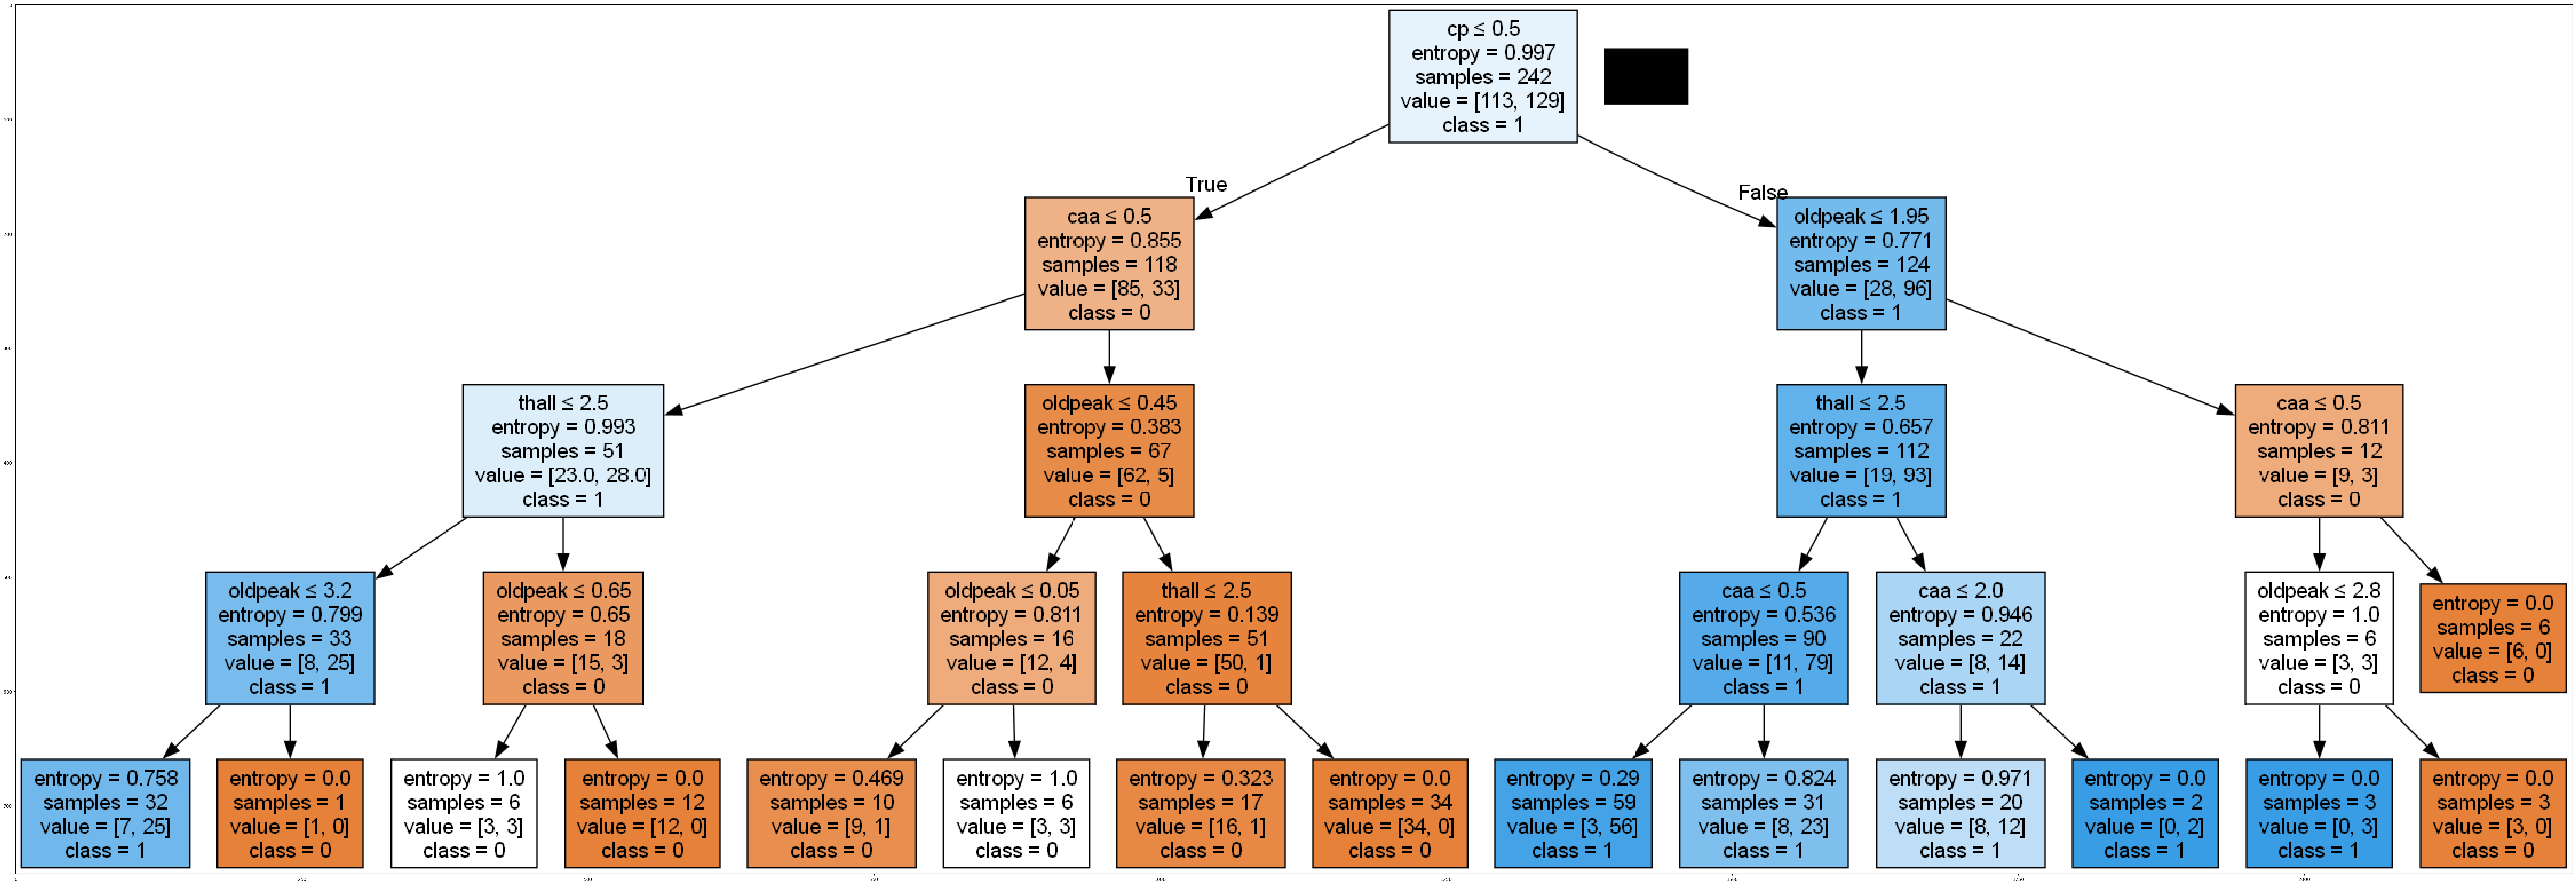

In [240]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= ['0', '1'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h1>Logistic Reg</h1>

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

In [247]:
LR_model = LogisticRegression(C=0.01, solver='liblinear')
LR = LR_model.fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
jaccard_score(y_test, yhat,pos_label=0)

np.float64(0.6451612903225806)

In [249]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61



In [250]:
log_loss(y_test, yhat_prob)

0.5298435159717461

<h1>SVM</h1>

In [259]:
from sklearn import svm

In [263]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

